In [1]:
using Plots
using LaTeXStrings
# using the pyplot backend
pyplot()

Plots.PyPlotBackend()

In [2]:
# Creating a fake dataset
x = -10:1.:10
y = x.^2
ese_y = sqrt(y); # errors as sqrt(y)

21-element Array{Float64,1}:
 10.0
  9.0
  8.0
  7.0
  6.0
  5.0
  4.0
  3.0
  2.0
  1.0
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

We create a scatter plot with the scatter command for displaying this dataset


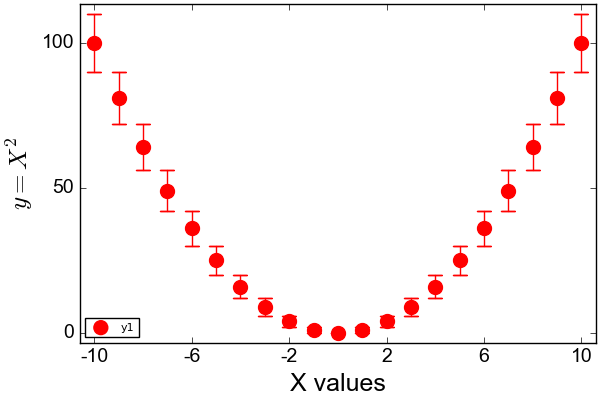

In [8]:
plt = scatter(x,y,
yerr=ese_y, # to indicate error bars, use the yerr or xerr keywords
color = :red, # this will only set the marker internal color
markerstrokecolor = :red, # to set the error bar colors to red, as well as the marker stroke color
markersize = 10,

# to set the labels use the following. Note that to use a latex fontend, 
# you need using the LaTeXStrings package with pyplot and add L before the text
xlabel = "X values", ylabel = L"$y = X^2$",

# to set the thicks font
xtickfont = font(14,"Arial"), ytickfont = font(14,"Arial"),

# to set the X axis values, same thing applies to y
xticks = -10:4:10,

# to control the display of the internal grid
grid = false)

# you need to set the label font with the `guidefont` argument after the first call, as for this subplot:
plt.subplots[1][:yaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(1.0,0.0,0.0))
plt.subplots[1][:xaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0))

# to display the plot again
plt


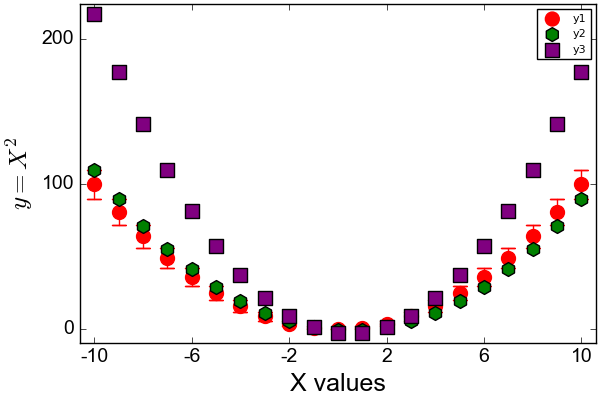

In [9]:
# Now we can even modify the y values
y2 = y-(x+0.5)
y3 = y2+y-(x+2)

# adding to the existing plot
scatter!(x,y2, marker = (:hexagon, 10, 1.0, :green))
scatter!(x,y3, marker = (:square, 10, 1.0, :purple))

plt

If we want to delete the first y1 and y2 for clarity, we can delete the corresponding series_list


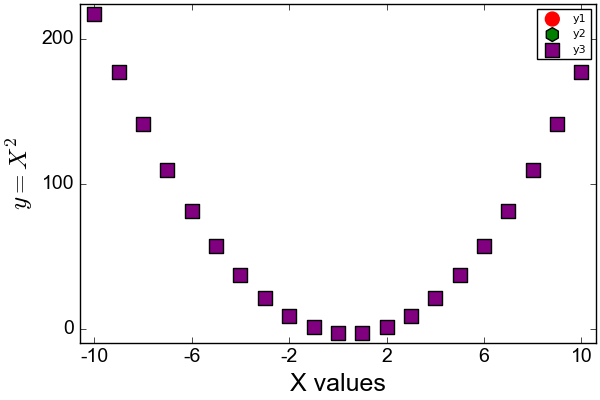

In [10]:
deleteat!(plt.series_list,1:3) # here we indicate 1 to 3 as we have y1, yerr and y2 as series
plt

We can even concatenate that in a GIF for a dynamic view of the plot!

In [11]:
plt2 = scatter(x,y,
yerr=ese_y, # to indicate error bars, use the yerr or xerr keywords
color = :red, # this is the marker internal color color
markerstrokecolor = :red, # to set the error bar colors to red
markersize = 10,
xlabel = "X values", 
ylabel = L"$y = X^2$",
xtickfont = font(14,"Arial"),
ytickfont = font(14,"Arial"),
grid = false,
xticks = -10:4:10,
leg=false, # no legend
ylims=(0,200) # fixed limits in y
)

plt2.subplots[1][:yaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(1.0,0.0,0.0))
plt2.subplots[1][:xaxis][:guidefont] = Plots.Font("Arial",18,:hcenter,:vcenter,0.0,RGB{U8}(0.0,0.0,0.0))

# to create the gif and record the frames
anim = Animation()
frame(anim) # we record the first frame

# we delete the first series and add a new one
deleteat!(plt2.series_list,1:2) # here we indicate 1 to 2 as we have y1, yerr as 2 series
scatter!(x,y2, marker = (:hexagon, 10, 1.0, :green)) # adding the y2 serie
frame(anim) # recording a frame

deleteat!(plt2.series_list,1) # we delete the y2 serie
scatter!(x,y3, marker = (:square, 10, 1.0, :purple)) # adding the y3 serie
frame(anim) # recording a frame

# note that the last steps can be embedded in a loop easily, look at the documentation for further details

# recording our gif file with 1 frame per second (to make it even slower, the trick is to record multiple time the same frame)
gif(anim, "example.gif", fps=1)

INFO: Saved animation to /Users/charles/Documents/PlotCodes/example.gif


Plots.AnimatedGif("/Users/charles/Documents/PlotCodes/example.gif")